<a href="https://colab.research.google.com/github/Rk-Pudasaini/Ktm_city_temperature_forcast_using_monte_carlo/blob/main/MC_KTM_CT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
df = pd.read_csv('/content/Kathmandu_Daily_Climate_Data.csv')
df.head()

,YEAR,DOY,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS2M,WS2M_MAX,WS2M_MIN,WS2M_RANGE,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE
0,1982,1,10.93,4.36,8.14,11.92,18.41,6.48,3.78,41.69,0.0,87.60,1.12,3.20,0.16,3.03,1.67,4.32,0.30,4.02
1,1982,2,10.20,3.57,7.24,11.12,17.26,6.15,3.54,41.00,0.0,87.45,1.17,3.52,0.08,3.45,1.66,4.73,0.07,4.66
2,1982,3,11.08,4.43,8.07,11.27,17.80,6.52,3.78,41.19,0.0,87.49,1.01,3.05,0.04,3.02,1.45,4.05,0.01,4.05
3,1982,4,13.26,6.25,10.29,10.85,20.05,9.19,4.15,39.25,0.0,87.71,1.22,3.06,0.30,2.77,1.76,4.08,0.44,3.64
4,1982,5,14.07,8.05,11.19,10.42,20.92,10.49,5.25,46.62,0.0,87.67,1.68,4.02,0.66,3.36,2.51,5.52,1.07,4.45


In [ ]:
# function to format the date columns in year- month and day type
def format_date(df):
    # Convert Year and DOY columns to datetime
    df['Date'] = pd.to_datetime(df['YEAR'].astype(str) + df['DOY'].astype(str), format='%Y%j')

    # Format the Date column as desired (Year-Month-Day)
    df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

    # Reorder columns to make "Date" the first column
    date_column = df.pop('Date')
    df.insert(0, 'Date', date_column)

    # Convert 'DATE' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Drop the "Year" and "DOY" columns
    df.drop(['YEAR', 'DOY'], axis=1, inplace=True)

    return df

df = format_date(df)
df.head()


,Date,T2M,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS2M,WS2M_MAX,WS2M_MIN,WS2M_RANGE,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE
0,1982-01-01,10.93,4.36,8.14,11.92,18.41,6.48,3.78,41.69,0.0,87.60,1.12,3.20,0.16,3.03,1.67,4.32,0.30,4.02
1,1982-01-02,10.20,3.57,7.24,11.12,17.26,6.15,3.54,41.00,0.0,87.45,1.17,3.52,0.08,3.45,1.66,4.73,0.07,4.66
2,1982-01-03,11.08,4.43,8.07,11.27,17.80,6.52,3.78,41.19,0.0,87.49,1.01,3.05,0.04,3.02,1.45,4.05,0.01,4.05
3,1982-01-04,13.26,6.25,10.29,10.85,20.05,9.19,4.15,39.25,0.0,87.71,1.22,3.06,0.30,2.77,1.76,4.08,0.44,3.64
4,1982-01-05,14.07,8.05,11.19,10.42,20.92,10.49,5.25,46.62,0.0,87.67,1.68,4.02,0.66,3.36,2.51,5.52,1.07,4.45


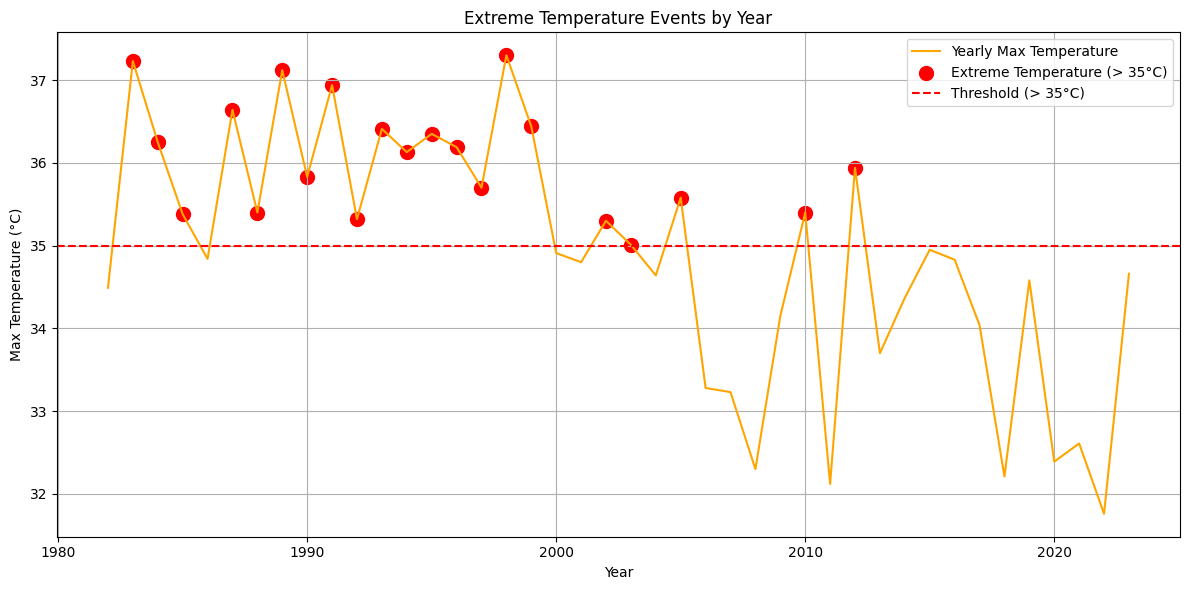

Date
1982    34.49
1983    37.23
1984    36.25
1985    35.38
1986    34.84
1987    36.64
1988    35.40
1989    37.12
1990    35.83
1991    36.94
1992    35.32
1993    36.41
1994    36.13
1995    36.35
1996    36.19
1997    35.70
1998    37.30
1999    36.44
2000    34.91
2001    34.80
2002    35.30
2003    35.01
2004    34.64
2005    35.58
2006    33.28
2007    33.23
2008    32.30
2009    34.15
2010    35.40
2011    32.12
2012    35.94
2013    33.70
2014    34.37
2015    34.95
2016    34.83
2017    34.04
2018    32.21
2019    34.58
2020    32.39
2021    32.61
2022    31.76
2023    34.66
Name: T2M_MAX, dtype: float64


In [ ]:
# Calculate yearly maximum values for the temperature variable
yearly_max_temperatures = df.groupby(df['Date'].dt.year)['T2M_MAX'].max()

# Define the threshold for extreme temperature events
temperature_threshold = 35

# Filter extreme events exceeding the threshold
extreme_temperature_events = yearly_max_temperatures[yearly_max_temperatures > temperature_threshold]

# Plot yearly maximum temperatures
plt.figure(figsize=(12, 6))
plt.plot(yearly_max_temperatures.index, yearly_max_temperatures.values, label='Yearly Max Temperature', color='orange')

# Plot extreme events exceeding the threshold
plt.scatter(extreme_temperature_events.index, extreme_temperature_events.values, color='red', label='Extreme Temperature (> 35°C)', marker='o', s=100)

# Add threshold line
plt.axhline(y=temperature_threshold, color='red', linestyle='--', label='Threshold (> 35°C)')

plt.xlabel('Year')
plt.ylabel('Max Temperature (°C)')
plt.title('Extreme Temperature Events by Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Return extreme temperature events
extreme_temperature_events

print(yearly_max_temperatures)


In [ ]:
# Define the columns to keep
columns_of_interest = ['Date', 'T2M', 'QV2M', 'PRECTOTCORR', 'PS']

# Filter the DataFrame to keep only the desired columns
df = df[columns_of_interest]
df.head()

,Date,T2M,QV2M,PRECTOTCORR,PS
0,1982-01-01,10.93,3.78,0.0,87.60
1,1982-01-02,10.20,3.54,0.0,87.45
2,1982-01-03,11.08,3.78,0.0,87.49
3,1982-01-04,13.26,4.15,0.0,87.71
4,1982-01-05,14.07,5.25,0.0,87.67


In [ ]:
df_without_date = df.drop(columns=['Date'])
df_without_date.describe().T

,count,mean,std,min,25%,50%,75%,max
T2M,15340.0,19.202557,5.031258,4.12,14.7975,20.66,23.15,30.11
QV2M,15340.0,9.522055,5.390868,0.98,4.6400,8.00,15.38,19.59
PRECTOTCORR,15340.0,2.502519,5.642385,0.00,0.0000,0.06,2.22,91.66
PS,15340.0,87.268512,0.403068,85.92,86.9500,87.29,87.60,88.44


In [ ]:
print(df['T2M'])

0        10.93
1        10.20
2        11.08
3        13.26
4        14.07
         ...  
15335    12.73
15336    12.90
15337    12.80
15338    12.52
15339    12.33
Name: T2M, Length: 15340, dtype: float64


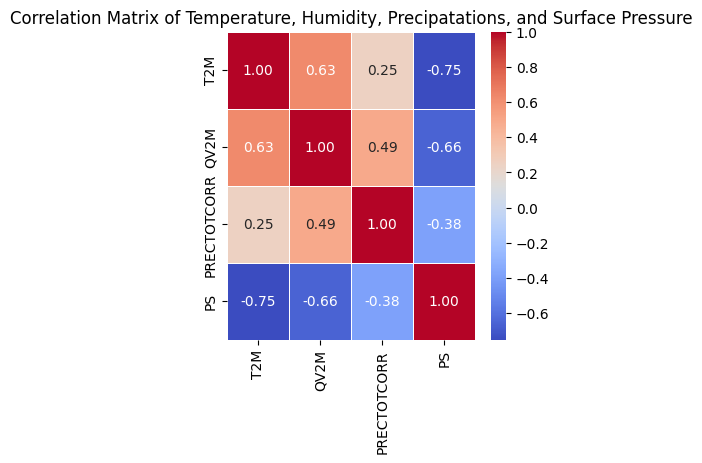

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_without_date.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Temperature, Humidity, Precipatations, and Surface Pressure')
plt.show()

Here we can see that temperature is positively corelated with humidity and precipations negatively corelated with pressure. Thus only two variable humidity and precipation is influencing the temperature trend.

# Distribution

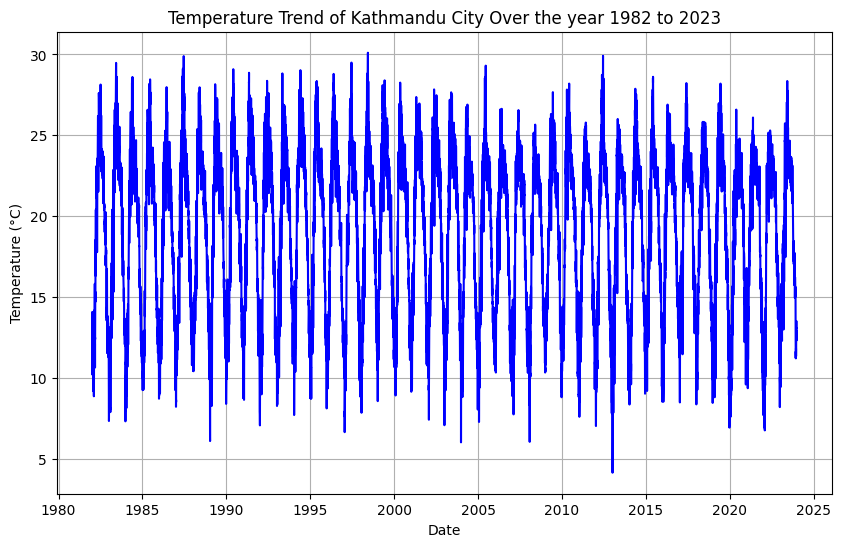

In [ ]:
# Convert 'Date' column to datetime format if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot temperature data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['T2M'], color='blue')
plt.title('Temperature Trend of Kathmandu City Over the year 1982 to 2023')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


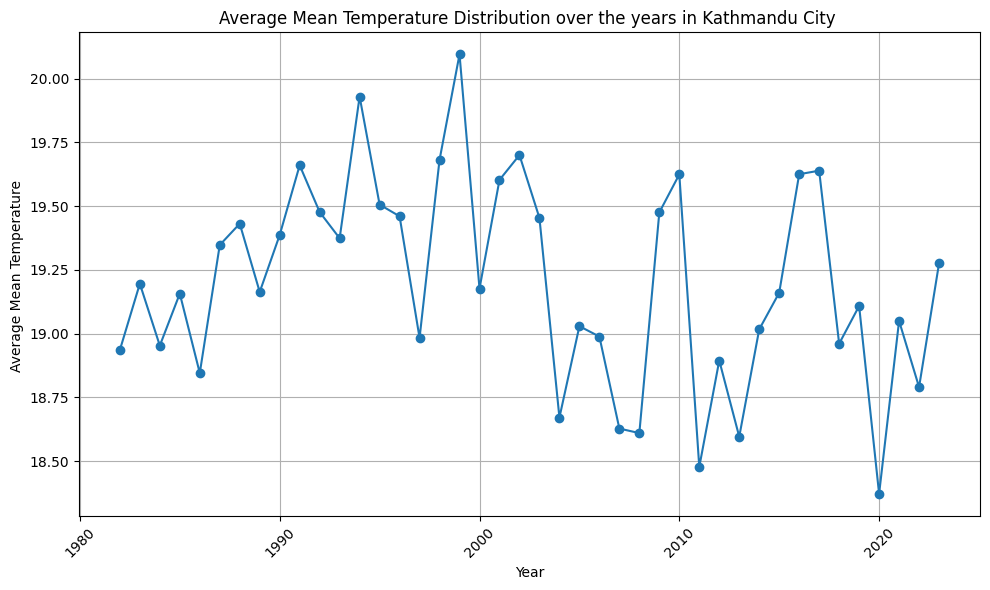

In [ ]:
# Group by year and calculate mean of the specified variable for each year
variable_distribution = df.groupby(df['Date'].dt.year)['T2M'].mean()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(variable_distribution.index, variable_distribution.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel(f'Average Mean Temperature ')
plt.title(f'Average Mean Temperature Distribution over the years in Kathmandu City ')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Prediction using Markov Chain

In [ ]:
def discretize_temperature_data(df, variable='T2M', num_bins=20):
    # Discretize temperature data into bins
    temperature_data = df[variable].values
    temperature_bins = np.linspace(temperature_data.min(), temperature_data.max(), num_bins + 1)
    discretized_data = np.digitize(temperature_data, temperature_bins)
    return discretized_data, temperature_bins

# Function to train the Markov chain model
def train_markov_chain(data, order=1):
    # Initialize transition matrix
    num_states = len(set(data))
    transition_matrix = np.zeros((num_states, num_states))

    # Convert data to a list of transitions
    transitions = [(data[i], data[i + 1]) for i in range(len(data) - 1)]

    # Count occurrences of each transition
    for transition in transitions:
        current_state, next_state = transition
        transition_matrix[current_state - 1, next_state - 1] += 1

    # Normalize transition matrix
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    transition_matrix /= row_sums

    return transition_matrix

# Function to predict future temperature trends
def predict_temperature_trend(model, initial_state, steps=365):
    current_state = initial_state
    predicted_states = [current_state]

    for _ in range(steps):
        current_index = current_state - 1
        next_index = np.random.choice(len(model[current_index]), p=model[current_index])
        next_state = next_index + 1
        predicted_states.append(next_state)
        current_state = next_state

    return predicted_states

# def plot_predicted_temperature(predicted_df):
#     # Plot the predicted temperature trend
#     plt.figure(figsize=(10, 6))
#     plt.plot(predicted_df['Date'], predicted_df['T2M'], color='blue')
#     plt.title('Predicted Temperature Trend for Kathmandu City')
#     plt.xlabel('Date')
#     plt.ylabel('Temperature (°C)')
#     plt.grid(True)
#     plt.show()

def plot_actual_and_predicted_temperature(actual_df, predicted_df):

    plt.figure(figsize=(10, 6))
    plt.plot(actual_df['Date'], actual_df['T2M'], color='red', label='Actual')
    plt.plot(predicted_df['Date'], predicted_df['T2M'], color='blue', label='Predicted')
    plt.title('Actual vs Predicted Temperature Trend for Kathmandu City')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_monthly_average_predicted_temperature(predicted_df):

    monthly_avg_predicted_temp = predicted_df.groupby(predicted_df['Date'].dt.month)['T2M'].mean()
    plt.figure(figsize=(10, 6))
    monthly_avg_predicted_temp.plot(kind='bar', color='green')
    plt.title('Monthly Average Predicted Temperature')
    plt.xlabel('Month')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

def compare_monthly_average_temperature(actual_df, predicted_df):

    monthly_avg_temp_actual = actual_df.groupby(actual_df['Date'].dt.month)['T2M'].mean()
    monthly_avg_predicted_temp = predicted_df.groupby(predicted_df['Date'].dt.month)['T2M'].mean()

    plt.figure(figsize=(10, 6))
    plt.plot(monthly_avg_temp_actual.index, monthly_avg_temp_actual.values, marker='o', label='2023', color='blue')
    plt.plot(monthly_avg_predicted_temp.index, monthly_avg_predicted_temp.values, marker='s', label='Predicted', color='green')
    plt.title('Comparison of Monthly Average Temperature')
    plt.xlabel('Month')
    plt.ylabel('Temperature (°C)')
    plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_transistion_matrix(model):
  # Plot transition probabilities using heatmap
  plt.figure(figsize=(15, 15))
  sns.heatmap(model, annot=True, cmap='Blues', fmt=".2f")
  plt.title('Transition Probabilities of Temperature States')
  plt.xlabel('To State')
  plt.ylabel('From State')
  plt.yticks(rotation=0)  # Rotate y-axis labels for better readability
  plt.show()



#Prediction for 2023

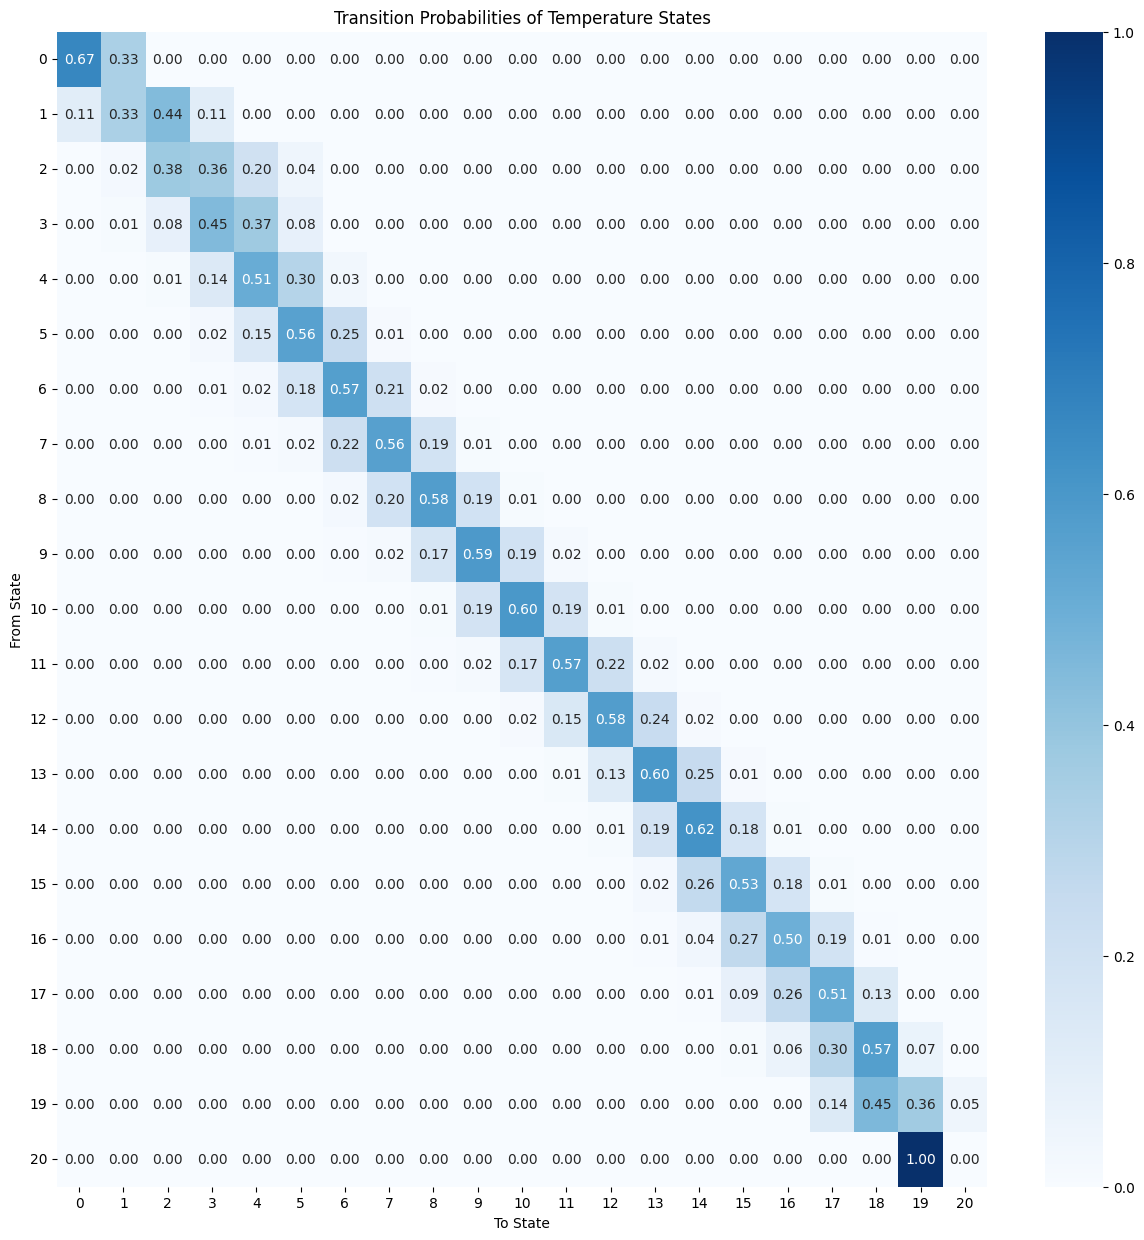

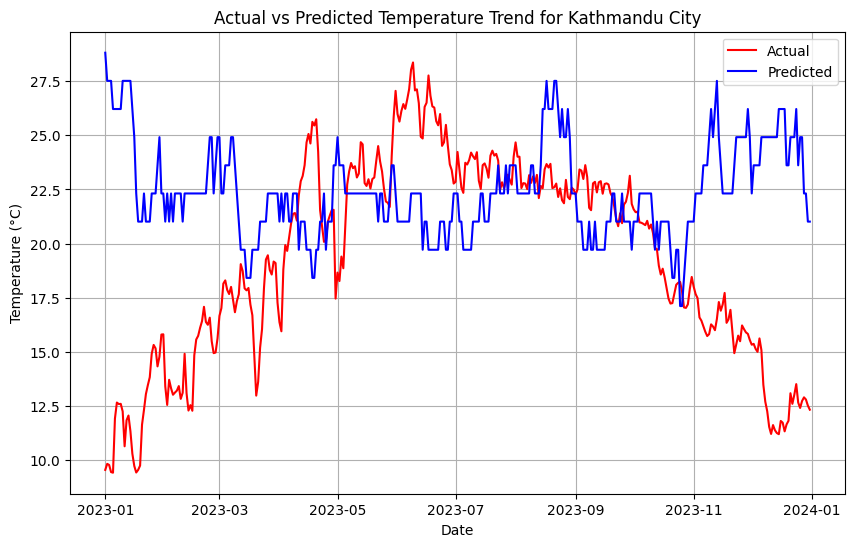

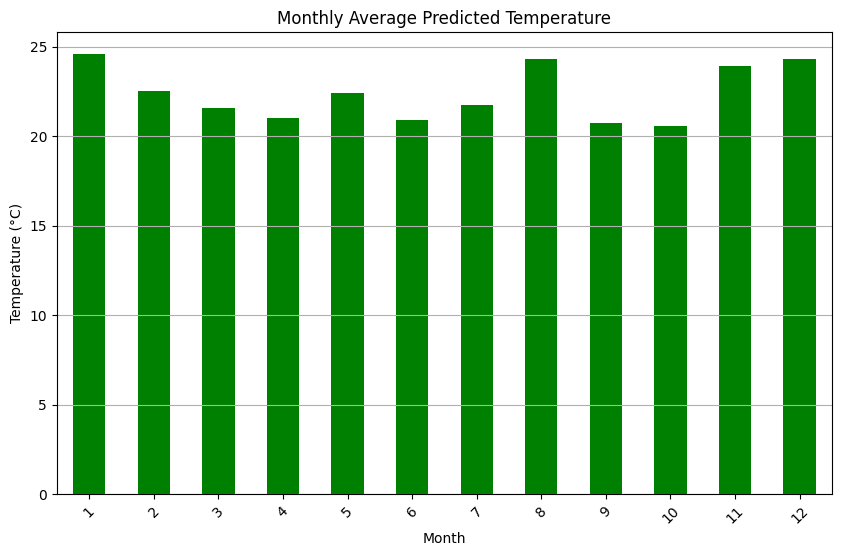

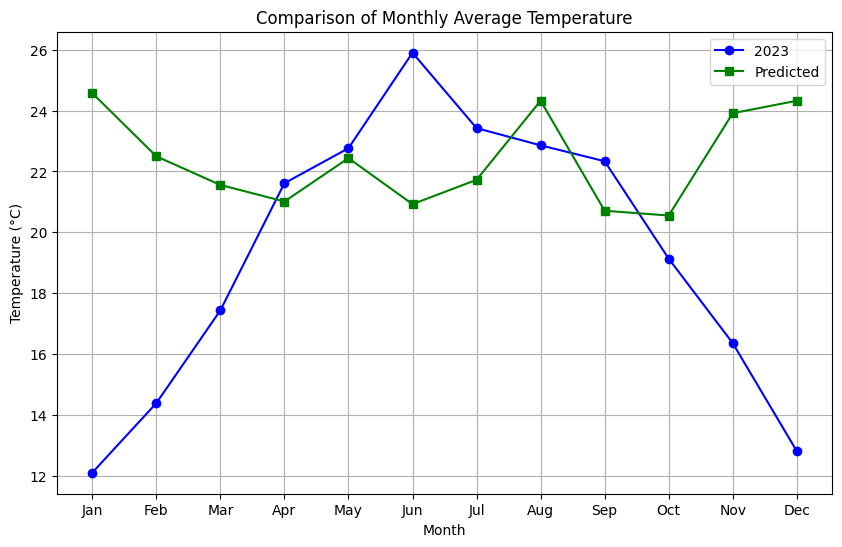

Mean Absolute Error: 5.035269863013697
Mean Square Error: 43.756914777397256
Root Mean Squared Error: 6.614900965048324


In [ ]:
num_bins = 20  # You can adjust the number of bins as needed

discretized_data, temperature_bins = discretize_temperature_data(df, variable='T2M', num_bins = 20)

# Set the order of the Markov chain model  this means looks at the current state to predict the next state
order = 1  # You can adjust this value as needed

# Train the Markov chain model
model = train_markov_chain(discretized_data, order)

# Plot the transistion matrix
plot_transistion_matrix(model)

# Define possible temperature states
states = np.arange(1, num_bins + 1)

# Set the initial state for prediction
initial_state = np.random.choice(states)

# Predict future temperature trend for one year (365 days)
predicted_trend = predict_temperature_trend(model, initial_state, steps=365)

# Convert predicted temperature trend to DataFrame with dates
start_date = pd.to_datetime('2023-01-01')
date_range = pd.date_range(start_date, periods=366)  # Include the initial date as well
predicted_df = pd.DataFrame({'Date': date_range[:-1], 'T2M': temperature_bins[np.array(predicted_trend) - 1][:len(date_range) - 1]})

# Filter data for the previous year (2023)
df_2023 = df[df['Date'].dt.year == 2023]
predicted_df_2023 = predicted_df.copy()

# Plot actual and predicted temperature trends
plot_actual_and_predicted_temperature(df_2023, predicted_df)
plot_monthly_average_predicted_temperature(predicted_df)
compare_monthly_average_temperature(df_2023, predicted_df_2023)

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming df contains the actual temperature data for 2023
# Calculate MAE and RMSE
mae = mean_absolute_error(df_2023['T2M'], predicted_df_2023['T2M'])
mse = mean_squared_error(df_2023['T2M'], predicted_df_2023['T2M'])
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Squared Error:", rmse)




#Prediction for one year ahead (2024)

In [ ]:
# num_bins = 20  # You can adjust the number of bins as needed

# discretized_data, temperature_bins = discretize_temperature_data(df, variable='T2M', num_bins = 20)

# # Set the order of the Markov chain model  this means looks at the current state to predict the next state
# order = 1  # You can adjust this value as needed

# # Train the Markov chain model
# model = train_markov_chain(discretized_data, order)

# # Define possible temperature states
# states = np.arange(1, num_bins + 1)

# # Set the initial state for prediction
# initial_state = np.random.choice(states)

# # Predict future temperature trend for one year (365 days)
# predicted_trend = predict_temperature_trend(model, initial_state, steps=365)

# # Convert predicted temperature trend to DataFrame with dates
# start_date = pd.to_datetime('2024-01-01')
# date_range = pd.date_range(start_date, periods=366)  # Include the initial date as well
# predicted_df = pd.DataFrame({'Date': date_range[:-1], 'T2M': temperature_bins[np.array(predicted_trend) - 1][:len(date_range) - 1]})

# plot_predicted_temperature(predicted_df)
# plot_monthly_average_predicted_temperature(predicted_df)

# # Filter data for the previous year (2023)
# df_2023 = df[df['Date'].dt.year == 2023]
# predicted_df_2024 = predicted_df.copy()

# compare_monthly_average_temperature(df_2023, predicted_df_2024)

# # Calculate MAE and RMSE
# mae = mean_absolute_error(df_2023['T2M'], predicted_df_2024['T2M'])
# mse = mean_squared_error(df_2023['T2M'], predicted_df_2024['T2M'])
# rmse = np.sqrt(mse)

# print("Mean Absolute Error:", mae)
# print("Mean Square Error:", mse)
# print("Root Mean Squared Error:", rmse)



In [ ]:
# import numpy as np
# import pandas as pd

# # Load the temperature data from the DataFrame
# temperature_data = df['T2M'].values

# # Discretize temperature data into bins
# num_bins = 20  # You can adjust the number of bins as needed
# temperature_bins = np.linspace(temperature_data.min(), temperature_data.max(), num_bins + 1)
# discretized_data = np.digitize(temperature_data, temperature_bins)

# # Function to train the Markov chain model
# def train_markov_chain(data, order=1):
#     # Initialize transition matrix
#     num_states = len(set(data))
#     transition_matrix = np.zeros((num_states, num_states))

#     # Convert data to a list of transitions
#     transitions = [(data[i], data[i + 1]) for i in range(len(data) - 1)]

#     # Count occurrences of each transition
#     for transition in transitions:
#         current_state, next_state = transition
#         transition_matrix[current_state - 1, next_state - 1] += 1

#     # Normalize transition matrix
#     row_sums = transition_matrix.sum(axis=1, keepdims=True)
#     transition_matrix /= row_sums

#     return transition_matrix

# # Function to predict future temperature trends
# def predict_temperature_trend(model, initial_state, steps=365):
#     current_state = initial_state
#     predicted_states = [current_state]

#     for _ in range(steps):
#         current_index = current_state - 1
#         next_index = np.random.choice(len(model[current_index]), p=model[current_index])
#         next_state = next_index + 1
#         predicted_states.append(next_state)
#         current_state = next_state

#     return predicted_states

# # Set the order of the Markov chain model  this means looks at the current state to predict the next state
# order = 1  # You can adjust this value as needed

# # Train the Markov chain model
# model = train_markov_chain(discretized_data, order)

# # Define possible temperature states
# states = np.arange(1, num_bins + 1)

# # Set the initial state for prediction
# initial_state = np.random.choice(states)

# # Predict future temperature trend for one year (365 days)
# predicted_trend = predict_temperature_trend(model, initial_state, steps=365)

# # Convert predicted temperature trend to DataFrame with dates
# start_date = pd.to_datetime('2024-01-01')
# date_range = pd.date_range(start_date, periods=366)  # Include the initial date as well
# predicted_df = pd.DataFrame({'Date': date_range[:-1], 'T2M': temperature_bins[np.array(predicted_trend) - 1][:len(date_range) - 1]})


# # Plot the predicted temperature trend
# plt.figure(figsize=(10, 6))
# plt.plot(predicted_df['Date'], predicted_df['T2M'], color='blue')
# plt.title('Predicted Temperature Trend for Kathmandu City')
# plt.xlabel('Date')
# plt.ylabel('Temperature (°C)')
# plt.grid(True)
# plt.show()

# # You can save the predicted temperature trend DataFrame to a CSV file if needed
# # predicted_df.to_csv('predicted_temperature_trend.csv', index=False)


# Prediction using different approach

In [ ]:
!pip install pymc3


In [ ]:
import os
os.environ['THEANO_FLAGS'] = 'blas__check_openmp=False'

In [ ]:
def calculate_prior_stats(df):
    monthly_prior_means = []
    monthly_prior_stds = []

    for month in range(1, 13):
        # Filter data for the current month
        month_data = df[df['Date'].dt.month == month]['T2M']

        # Calculate mean and standard deviation for the current month
        mean = month_data.mean()
        std = month_data.std()

        # Append mean and standard deviation to lists
        monthly_prior_means.append(mean)
        monthly_prior_stds.append(std)

    return monthly_prior_means, monthly_prior_stds

# Calculate prior means and standard deviations for each month
monthly_prior_means, monthly_prior_stds = calculate_prior_stats(df)


In [ ]:
import pymc3 as pm
def perform_bayesian_inference(monthly_prior_means, monthly_prior_stds, df):
    with pm.Model() as model:
        # Priors for mean and standard deviation
        mu = [pm.Normal(f'mu_{month}', mu=mean, sigma=5) for month, mean in enumerate(monthly_prior_means, start=1)]
        sigma = [pm.HalfNormal(f'sigma_{month}', sigma=std) for month, std in enumerate(monthly_prior_stds, start=1)]

        # Likelihood function
        for month, (m, s) in enumerate(zip(mu, sigma), start=1):
            pm.Normal(f'likelihood_{month}', mu=m, sigma=s, observed=df[df['Date'].dt.month == month]['T2M'])

        # Sample from the posterior distribution
        trace = pm.sample(1000, tune=1000)

        # Sample from the posterior predictive distribution for 2024
        posterior_samples_2024 = [pm.sample_posterior_predictive(trace, samples=1000,
                                                                 var_names=[f'likelihood_{month}'])
                                   for month in range(1, 13)]

    return trace, posterior_samples_2024

def generate_predictions(trace, posterior_samples_2024):
    # Create a list to store daily average temperatures for each month
    daily_avg_by_month = [[] for _ in range(12)]

    # Populate the list with daily average temperatures from the predictive samples
    for month_samples in posterior_samples_2024:
        month_key = next(iter(month_samples))  # Get the first (and only) key
        month_idx = int(month_key.split('_')[1]) - 1  # Extract the month index
        daily_avg_samples = np.mean(month_samples[month_key], axis=1)  # Calculate daily average
        daily_avg_by_month[month_idx].extend(daily_avg_samples)

    return daily_avg_by_month


# Example usage:
trace, posterior_samples_2024 = perform_bayesian_inference(monthly_prior_means, monthly_prior_stds, df)
daily_avg_by_month = generate_predictions(trace, posterior_samples_2024)


/usr/local/lib/python3.10/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:187: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


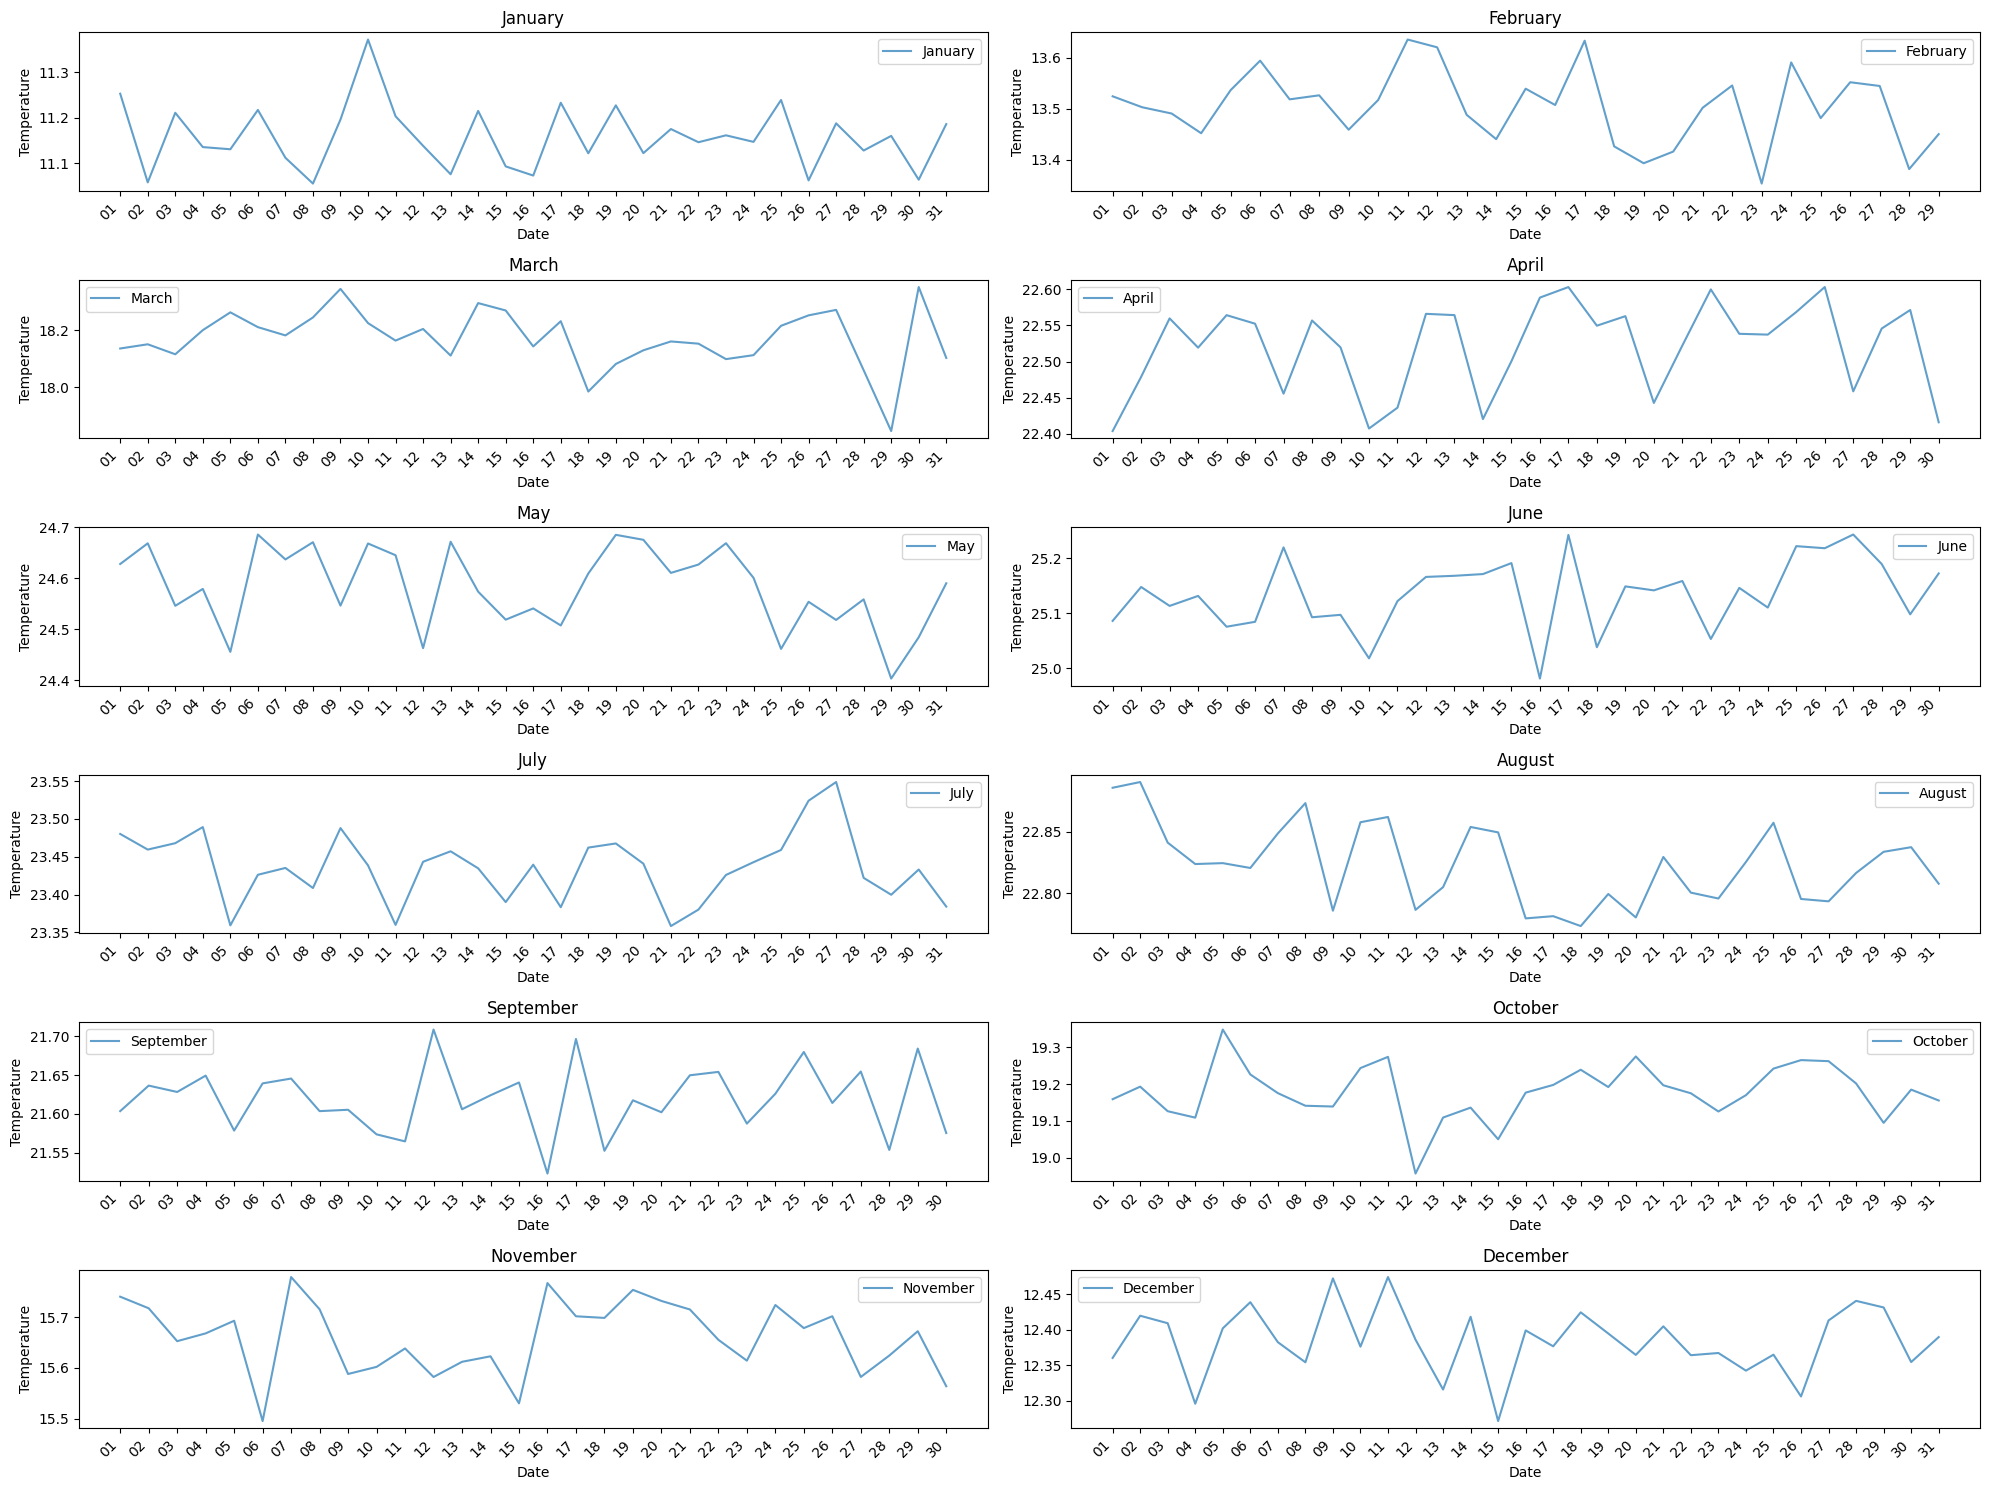

In [ ]:
def plot_monthly_wise(daily_avg_by_month):
    fig, axs = plt.subplots(6, 2, figsize=(20, 15))  # 6 rows, 2 columns for 12 months

    for i, ax in enumerate(axs.flatten(), start=1):
        month_data = daily_avg_by_month[i-1]
        month_year = 2024  # Leap year
        if i == 2:  # February
            if month_year % 4 == 0 and (month_year % 100 != 0 or month_year % 400 == 0):
                num_days_in_month = 29  # Leap year
            else:
                num_days_in_month = 28  # Non-leap year
        else:
            num_days_in_month = calendar.monthrange(2024, i)[1]

        month_start_date = pd.Timestamp(f'{month_year}-{i:02d}-01')  # Pad month with zero if needed
        month_end_date = month_start_date + pd.DateOffset(days=num_days_in_month - 1)  # Calculate end date of the month
        month_dates = pd.date_range(start=month_start_date, end=month_end_date, freq='D')

        # Plot the data for the month
        ax.plot(month_dates, month_data[:num_days_in_month], label=calendar.month_name[i], alpha=0.7)

        # Label each day of the month on the x-axis
        ax.set_xticks(month_dates)
        ax.set_xticklabels([d.strftime('%d') for d in month_dates], rotation=45, ha='right')

        ax.set_xlabel('Date')
        ax.set_ylabel('Temperature')
        ax.set_title(calendar.month_name[i])
        ax.legend()

    plt.tight_layout()
    plt.show()

# Plot monthly-wise with daily monthly data
plot_monthly_wise(daily_avg_by_month)

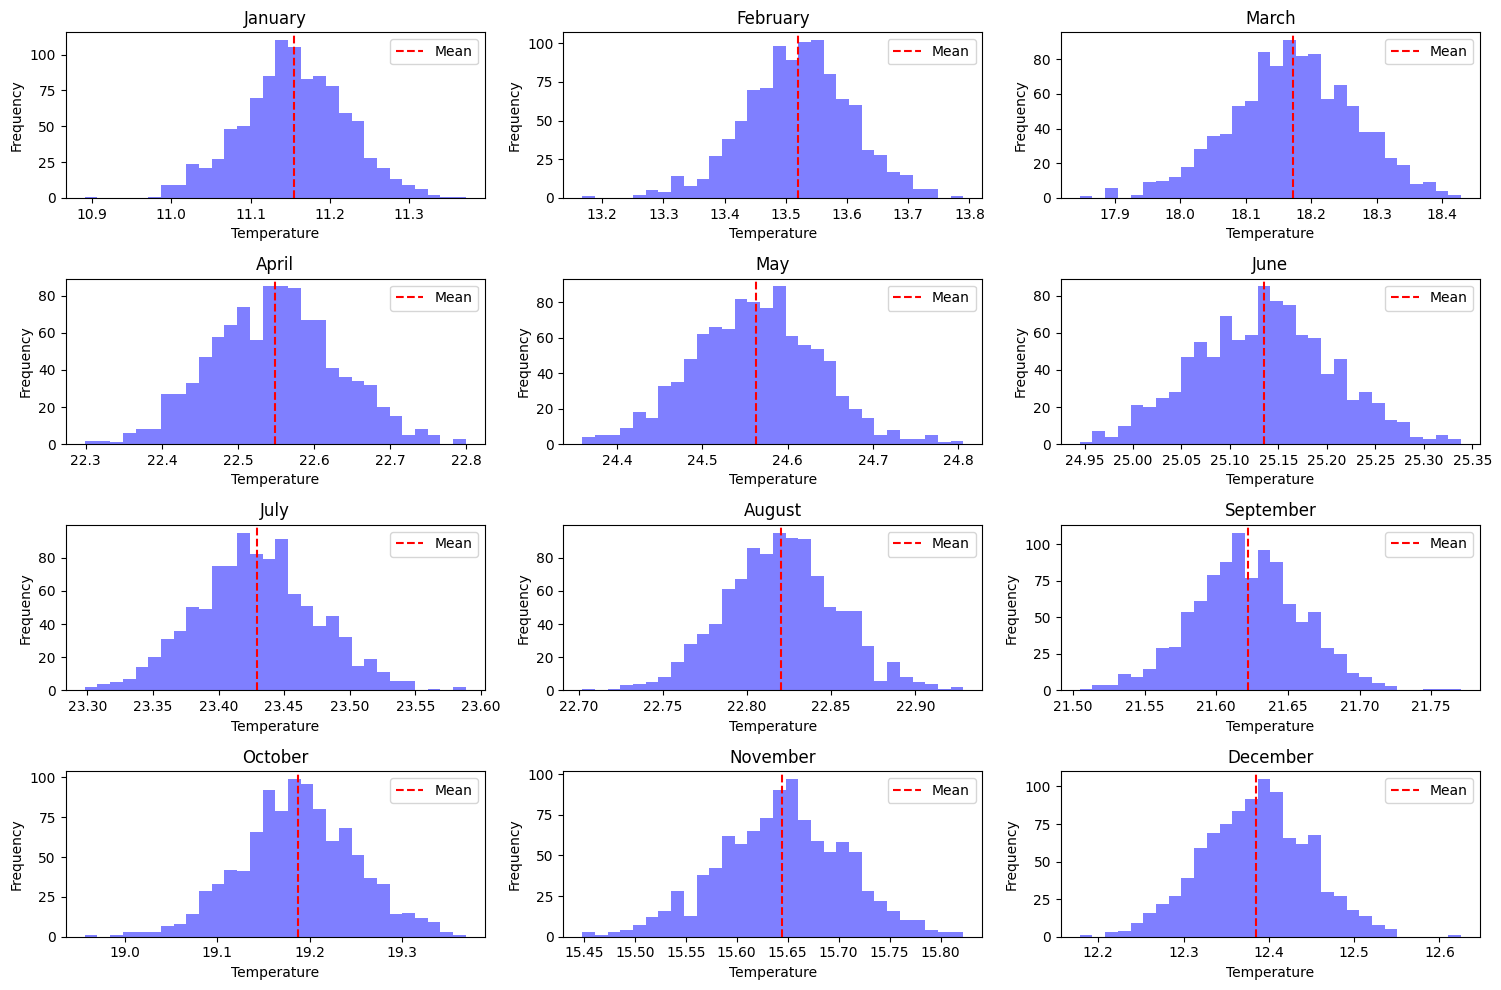

In [ ]:
def plot_monthly_histogram(daily_avg_by_month):
    plt.figure(figsize=(15, 10))

    for i, month_data in enumerate(daily_avg_by_month, start=1):
        plt.subplot(4, 3, i)
        plt.hist(month_data, bins=30, color='blue', alpha=0.5)
        plt.axvline(x=np.mean(month_data), color='red', linestyle='--', label='Mean')
        plt.title(calendar.month_name[i])
        plt.xlabel('Temperature')
        plt.ylabel('Frequency')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Call plot_monthly_histogram function
plot_monthly_histogram(daily_avg_by_month)


In [ ]:
def generate_df_predicted_2024(monthly_averages_30_days):
    # Define the number of days in each month for a non-leap year
    days_in_months_non_leap = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

    # Create an empty DataFrame to store the predicted temperatures for 2024
    df_predicted_2024 = pd.DataFrame(columns=['Date', 'T2M'])

    # Iterate over each month
    for i in range(1, 13):
        month_data = monthly_averages_30_days[i-1]
        month_year = 2024  # Leap year
        if i == 2:  # February
            if month_year % 4 == 0 and (month_year % 100 != 0 or month_year % 400 == 0):
                num_days_in_month = 29  # Leap year
            else:
                num_days_in_month = 28  # Non-leap year
        else:
            num_days_in_month = days_in_months_non_leap[i-1]

        month_start_date = pd.Timestamp(f'{month_year}-{i:02d}-01')  # Pad month with zero if needed
        month_end_date = month_start_date + pd.DateOffset(days=num_days_in_month - 1)  # Calculate end date of the month
        month_dates = pd.date_range(start=month_start_date, end=month_end_date, freq='D')

        # Create a DataFrame for the current month's data
        month_df = pd.DataFrame({'Date': month_dates, 'T2M': month_data[:num_days_in_month]})

        # Append the current month's data to df_predicted_2024
        df_predicted_2024 = pd.concat([df_predicted_2024, month_df], ignore_index=True)

    return df_predicted_2024

# Generate df_predicted_2024
df_predicted_2024 = generate_df_predicted_2024(daily_avg_by_month)
df_predicted_2024.head()

,Date,T2M
0,2024-01-01,11.252536
1,2024-01-02,11.058210
2,2024-01-03,11.210681
3,2024-01-04,11.135515
4,2024-01-05,11.130731


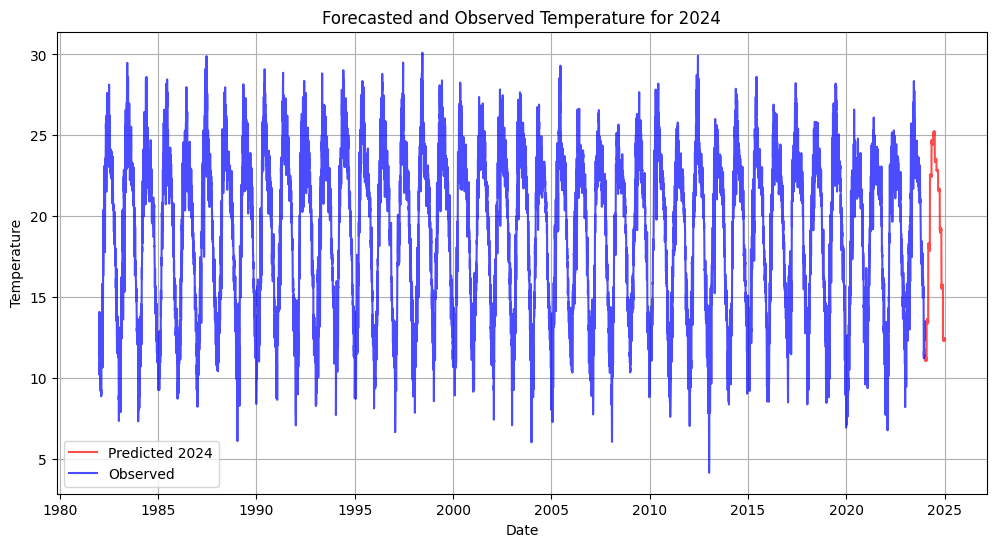

In [ ]:
def combine_predicted_observed(df_predicted_2024, df_observed):
    # Plot the combined forecasted and observed temperatures
    plt.figure(figsize=(12, 6))

    # Plot predicted temperatures for 2024
    plt.plot(df_predicted_2024['Date'], df_predicted_2024['T2M'], label='Predicted 2024', color='red', alpha=0.7)

    # Plot observed temperatures
    plt.plot(df_observed['Date'], df_observed['T2M'], label='Observed', color='blue', alpha=0.7)

    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title('Forecasted and Observed Temperature for 2024 Using Bayesian Analysis')
    plt.legend()
    plt.grid(True)
    plt.show()


# Call combine_predicted_observed function
combine_predicted_observed(df_predicted_2024, df)


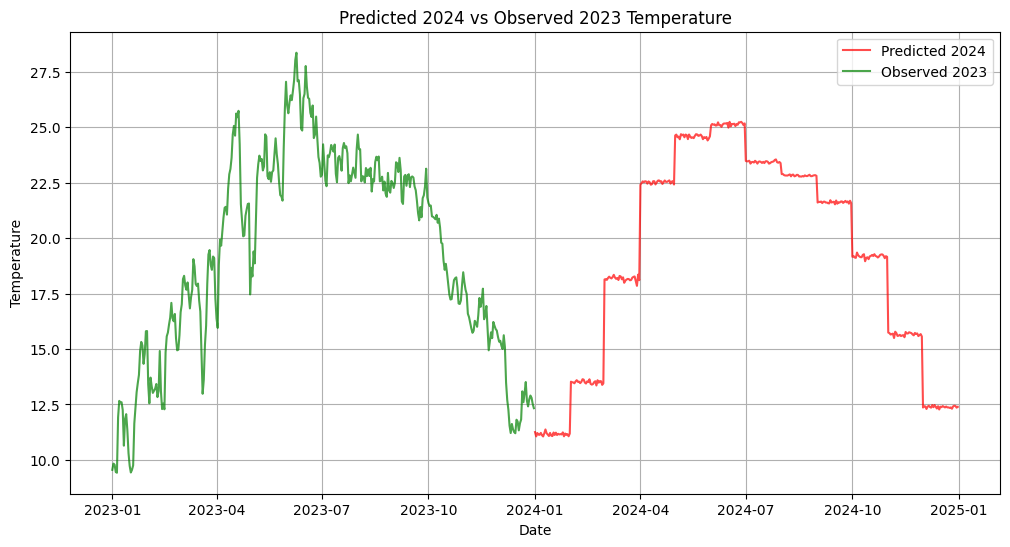

In [ ]:
# Filter data for the previous year (2023)
df_2023 = df[df['Date'].dt.year == 2023]# Get observed temperatures for 2023
#df_observed_2023 = df_2023['T2M']

def compare_2024_predicted_with_2023_observed(df_predicted_2024, df_observed_2023):
    # Plot the combined forecasted temperatures for 2024 and observed temperatures for 2023
    plt.figure(figsize=(12, 6))

    # Plot predicted temperatures for 2024
    plt.plot(df_predicted_2024['Date'], df_predicted_2024['T2M'], label='Predicted 2024', color='red', alpha=0.7)

    # Plot observed temperatures for 2023
    plt.plot(df_2023['Date'], df_2023['T2M'], label='Observed 2023', color='green', alpha=0.7)

    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title('Predicted 2024 vs Observed 2023 Temperature')
    plt.legend()
    plt.grid(True)
    plt.show()


#Compare predicted 2024 temperatures with 2023 observed temperatures
compare_2024_predicted_with_2023_observed(df_predicted_2024, df_2023)

<ipython-input-23-f9221a667536>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['Date'] = df_2023['Date'].dt.strftime('%m-%d')


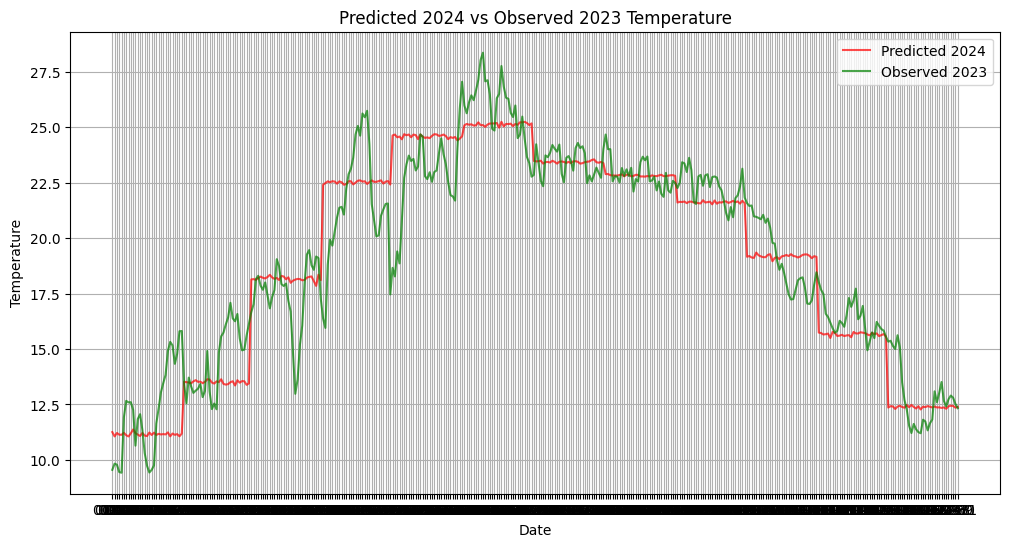

In [ ]:
df_predicted_2024['Date'] = df_predicted_2024['Date'].dt.strftime('%m-%d')
df_2023['Date'] = df_2023['Date'].dt.strftime('%m-%d')

# Plot the combined forecasted temperatures for 2024 and observed temperatures for 2023
plt.figure(figsize=(12, 6))

# Plot predicted temperatures for 2024
plt.plot(df_predicted_2024['Date'], df_predicted_2024['T2M'], label='Predicted 2024', color='red', alpha=0.7)

# Plot observed temperatures for 2023
plt.plot(df_2023['Date'], df_2023['T2M'], label='Observed 2023', color='green', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Predicted 2024 vs Observed 2023 Temperature')
plt.legend()
plt.grid(True)
plt.show()